# **The Best Neighborhood to Be an Actual Panther**
![panther](https://media.giphy.com/media/MdPMINWIKCKS4/giphy.gif)

## **Introduction**

## **The Metrics**

### **Ally's metric (habitat/forests)**

### ANY WORDS NEEDED TO BE ADDED ABOUT THE METRIC GO HERE

In [ ]:
import pandas as pd
import geopandas
%matplotlib inline

#reads the dataset
data = pd.read_csv("data/Pittsburgh Parks.csv")

#Gets just the entries with the type "Park"
query_mask = data["type"]=="Park" 
gridcode = data[query_mask]
gridcode.head(10)


#Sums the amount of entries each neighborhood has in the dataset, and this will show how many parks are in each neighborhood
gridcode = gridcode.groupby("neighborhood").count()["type"].sort_values(ascending=False)


#plots a bar graph of the Top 10 neighborhoods with the most parks in Pittsburgh
top10 = gridcode.head(10)

top10.plot(kind="bar", color="skyblue", edgecolor="black")



#Makes a Choropleth map of Pittsburgh showing the how many parks each neighborhood has
parkmap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

parkmap = parkmap.drop(columns =['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parks = parkmap.merge(gridcode, how="left", left_on="hood", right_on="neighborhood")



parks.plot(column="type", cmap="summer_r", edgecolor="white", legend=True, legend_kwds={'label': 'Number of Parks'}, figsize = (15,10), 
           missing_kwds={"color":"lightgrey"})

### **Anika's Metric - Deer Population** 

Panthers need to eat! We tried to gauge relative deer population in the neighborhoods so that we could see where they would be able to feast and where they would have to eat scraps.

DISCLAIMER: This analysis assumes that the amount of deer crossing signs correlates to the deer's presence and therefore population in the area. I.e., the more deer crossing signs, the more deer there are in that neighborhood.

![deer](https://media.giphy.com/media/26gsvA7sDa86fDu6s/giphy.gif)

&nbsp;

First, let's sort through all of the traffic signs (we only need to worry about deer signs).


In [4]:
import pandas as pd
import geopandas
%matplotlib inline

#Sort through traffic sign data to eliminate any row that is not a deer sign
signs = pd.read_csv("data/trafficSigns.csv")
deer_mask = signs["description"] == "Deer"
deer_signs = signs[deer_mask]

#Count and sort by how many deer signs each neighborhood has and print out Top Ten
deer_signs = deer_signs.groupby("neighborhood").count()["description"].sort_values(ascending=False)
print("\nDeer Signs By Neighborhood:\n\n", deer_signs)


Deer Signs By Neighborhood:

 neighborhood
Squirrel Hill South    11
Perry North             7
Stanton Heights         6
Duquesne Heights        3
South Side Slopes       3
Allentown               2
Crafton Heights         2
Perry South             2
Arlington               1
Arlington Heights       1
Brookline               1
Fairywood               1
Sheraden                1
St. Clair               1
Swisshelm Park          1
Troy Hill               1
Name: description, dtype: int64


&nbsp;

Perfect! But, it would be nice to see the values and *visualize* the data...

&nbsp;


Text(0, 0.5, 'Number of Deer Crossing Signs')

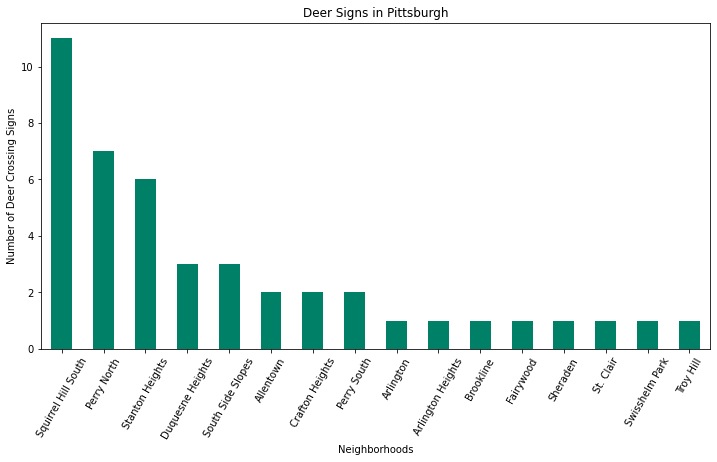

In [7]:
#Plot the results on a bar graph
chart = deer_signs.plot.bar(x="Neighborhood", y="Number of Deer Signs", colormap="summer", rot=60, figsize=(12,6))
chart.set_title("Deer Signs in Pittsburgh")
chart.set_xlabel("Neighborhoods")
chart.set_ylabel("Number of Deer Crossing Signs")

&nbsp;

Much better. But, how do we know if any of these neighborhoods overlap with the habitats we just found? If you're like me and you aren't from Pittsburgh, not many of these names mean anything to you. What if we had a map that could show us where the most deer signs are?

&nbsp;


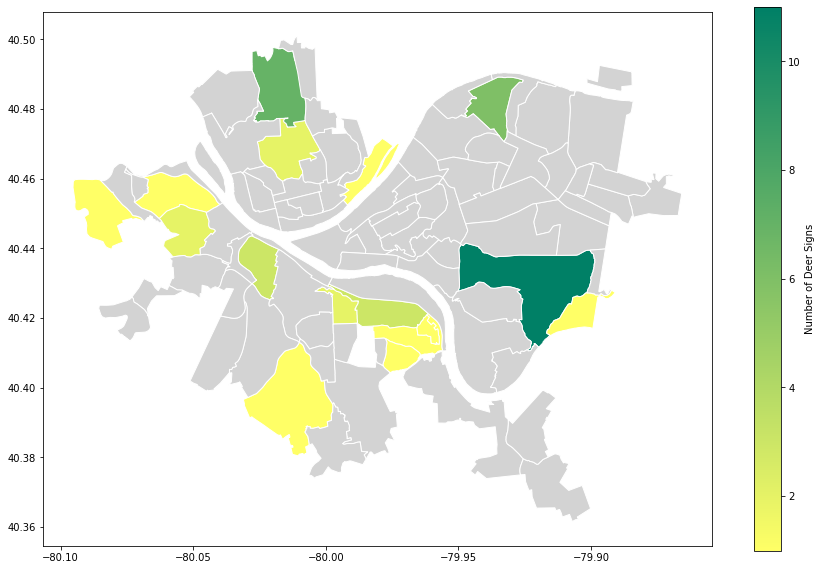

In [8]:
#Make general map, merge data
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods = neighborhoods.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10','tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
deer_map = neighborhoods.merge(deer_signs, how='left', left_on='hood', right_on='neighborhood')

#Plot the chloropleth map
deer_map.plot(column='description', cmap='summer_r', edgecolor="white", legend=True, 
              legend_kwds={'label': "Number of Deer Signs"}, figsize=(15,10),
              missing_kwds={"color": "lightgrey"})

#### Conclusion

Overall, the best neighborhood to hunt deer in is by far and large, 
##### **Squirrell Hill South!**
It has about 57% more deer signs than any of its competition. However, Perry North and Stanton Heights still have a considerable amount (7 and 6 signs respectively). Duquesne Heights and South Side Slopes have a few, and most of the other neighborhoods barely have any at all. 

&nbsp;


### **Tess's metric - Population Density!!**
![panther](https://media.giphy.com/media/RK4ubVL8FwKmdpHxNg/giphy.gif)

Believe it or not, panthers aren't fond of people! Parks can be in populus areas so we decided to explore the population density. 
I did this by exploring the population and square miles per neighborhood and calculating square miles
and printing out the top 20 least populated neighborhoods

In [22]:
import pandas as pd

area = pd.read_csv("data/neighborhoods.csv")
population = pd.read_csv("data/total-population.csv") ##Finding Files

area1 = area[["hood", "sqmiles"]].rename(columns={'hood': 'Neighborhood'})
pop1 = population[["Neighborhood", "Estimate; Total"]]

density = pd.merge(pop1, area1, on='Neighborhood')  ##Combining Columns
density['popDensity'] = density['Estimate; Total'] / density['sqmiles'] ##Calculate Population Density
density = density.sort_values(by='popDensity', ascending=True) 

search = density[density['Neighborhood'] == 'Perry South']
print(search)
# avg_density = density['popDensity'].mean()
# print("Average Population Density for All Neighborhoods:", avg_density)


   Neighborhood  Estimate; Total   sqmiles   popDensity
61  Perry South           3398.0  0.906346  3749.119473


Thats helpful, lets look at it in a bar graph style. I set a limit on population density and explored each of the neighboods with less than 3000 people per square mile

Text(0, 0.5, 'Population Density')

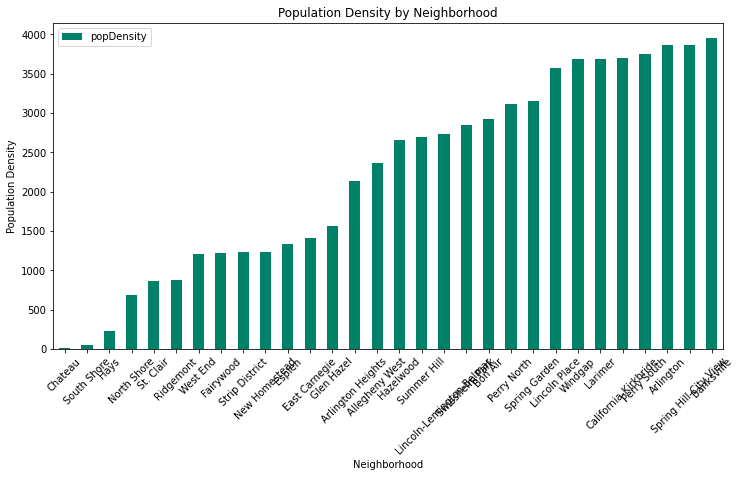

In [23]:
limit = 4000 
bar_mask = density['popDensity'] < limit

lowPop = density[bar_mask]

chart = lowPop.plot.bar(x="Neighborhood", y="popDensity", colormap="summer", rot=45, figsize=(12,6))

chart.set_title("Population Density by Neighborhood")
chart.set_xlabel("Neighborhood")
chart.set_ylabel("Population Density")


Alright cool! Lets look at these neighborhoods in a map format. 

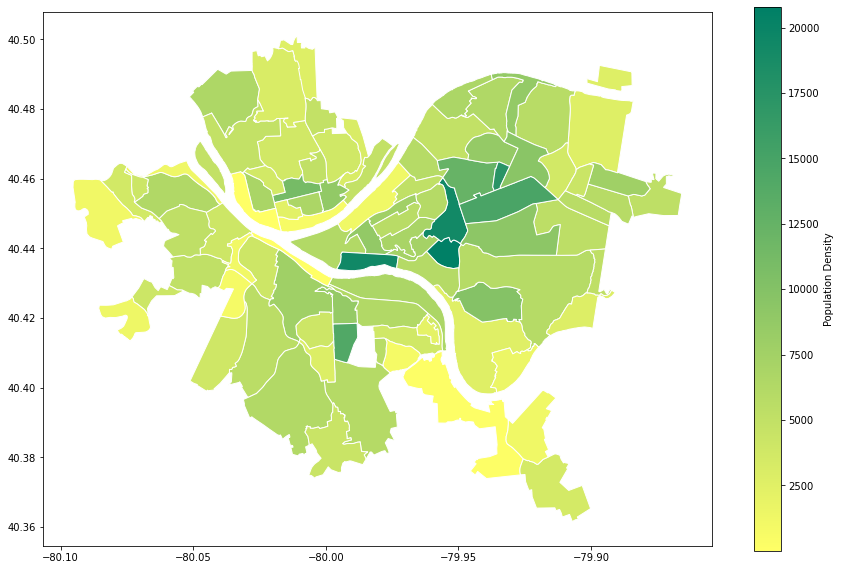

In [4]:
import geopandas
%matplotlib inline

parkmap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
parkmap = parkmap.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
                                'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
                                'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
                                'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
                                'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
                                'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
                                'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parkmap.rename(columns={'hood': 'Neighborhood'}, inplace=True)


dense = parkmap.merge(density, how="left", on="Neighborhood")


dense.plot(
    column="popDensity",
    cmap="summer_r",
    edgecolor="white",
    legend=True,
    legend_kwds={'label': "Population Density"},
    figsize=(15, 10),
)

## **Results**

## **Conclusion**
### (our favorite neighborhoods in comparison)

**Ally:**

**Anika:** I am not from Pittsburgh or even Pennsylvania, so I had never heard of Perry North. I can't say if I was really suprised or not. Overall, I'd say my favorite neighborhood so far has been North Shore just because there is such a wide variety of things to do there. You can go to games, explore museums, and eat at a bunch of different restaurants that have a wide variety of options. I feel like it has a little bit of something for everyone. It is understandeable though, that it wouldn't be best for a panther because it is such a hub of activity and it's pretty much one slab of concrete - so, not exactly ideal for a solitary animal.

**Tess:**